### Customer Segmentation using Unsupervised Machine Learning in Python

In [ ]:
# Name = Ku.Apurva R. Bire
# Title = Customer Segmentation using unsupervised machine learning in python

In [ ]:
# Customer Segmentation = Customer Segmentation involves grouping customers 
# based on shared characteristics,behaviors and preferences. 
# By segmenting customers, businesses can tailor their strategies and 
# target specific groups more effectively and enhance overall market value.

In [ ]:
# Step 1 : Import Libraries
# Importing the necessary libraries like Pandas, Numpy, Matplotlib, Seaborn and Sklearn.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Step 2: Load the Dataset
# About Dataset = Mall Customer Segmentation Data.
# This dataset contains the basic information (ID, age, gender, income, spending score) about the customers
# Implementing Customer Segmentation Concepts to score a customer based on their behaviors and purchasing data.

In [5]:
df = pd.read_csv('/Users/admin/Desktop/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Step 3: Data Preprocessing

In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe().T[["mean", "std", "min", "max"]]

,mean,std,min,max
CustomerID,100.50,57.879185,1.0,200.0
Age,38.85,13.969007,18.0,70.0
Annual Income (k$),60.56,26.264721,15.0,137.0
Spending Score (1-100),50.20,25.823522,1.0,99.0


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df["Spending Score (1-100)"].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [11]:
# Encode Gender column

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [12]:
# Feature selection (most commonly used for segmentation)

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Elbow Method to find K

In [ ]:
# Elbow Method =  Elbow Method helps to find the optimal number of clusters (K).
# It calculates WCSS (Within Cluster Sum of Squares) for different K values.
# WCSS measures how compact the clusters are.
# The point where the decrease in WCSS slows down (looks like an elbow)
# is considered the best value of K.

# WCSS (Within Cluster Sum of Squares) is the total distance
# between each data point and its cluster center.
# Lower WCSS means better clustering.

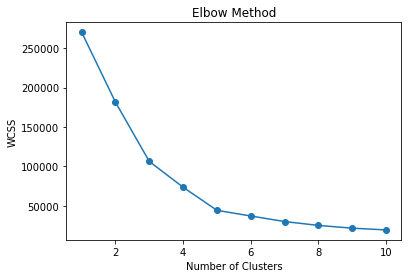

In [13]:
# Elbow Method to find K

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Apply K-Means

In [ ]:
# K-Means = K-Means is an unsupervised machine learning algorithm.
# It groups customers into 'K' clusters based on similarity.
# Customers inside the same cluster are more similar to each other
# than to customers in other clusters.
# Here, similarity is measured using distance (Euclidean distance).

In [15]:
# Apply K-Means (k = 5)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

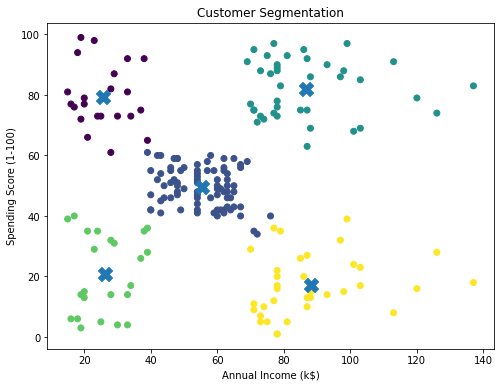

In [56]:
# Visualize Clusters

plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df['Cluster'])
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200,
    marker='X'
)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
# This visualization proves that K-Means clustering successfully segments customers 
# and helps businesses design targeted marketing and customer retention strategies.
# The cluster visualization demonstrates that customers can be effectively grouped into 
# distinct segments based on income and spending behavior, enabling better business decision-making.

In [20]:
# Show clustered data

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,0
2,3,0,20,16,6,3
3,4,0,23,16,77,0
4,5,0,31,17,40,3


In [26]:
# Cluster-wise average values
# Insight you get:
# Which cluster has highest income
# Which spends the most
# Age pattern per cluster

cluster_summary = df.groupby('Cluster').mean()
(cluster_summary)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,23.090909,0.409091,25.272727,25.727273,79.363636
1,86.320988,0.407407,42.716049,55.296296,49.518519
2,162.000000,0.461538,32.692308,86.538462,82.128205
3,23.000000,0.391304,45.217391,26.304348,20.913043
4,164.371429,0.542857,41.114286,88.200000,17.114286


In [39]:
# Count customers per cluster

print ('Target clusters with high value + large population.')

cluster_counts = df['Cluster'].value_counts()
(cluster_counts)

Target clusters with high value + large population.


1    81
2    39
4    35
3    23
0    22
Name: Cluster, dtype: int64

In [38]:
# Gender-wise distribution in each cluster

print('Gender-wise distribution in each cluster helps companies design gender-specific campaigns')

gender_cluster = pd.crosstab (df['Cluster'], df['Gender'])
(gender_cluster)

Gender-wise distribution in each cluster helps companies design gender-specific campaigns


Gender,0,1
Cluster,,
0,13,9
1,48,33
2,21,18
3,14,9
4,16,19


In [41]:
# High income & high spending customers

high_value_customers = df[
    (df['Annual Income (k$)'] > 70) &
    (df['Spending Score (1-100)'] > 70)
]

(high_value_customers.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
127,128,1,40,71,95,2
129,130,1,38,71,75,2
131,132,1,39,71,75,2
133,134,0,31,72,71,2
135,136,0,29,73,88,2


In [52]:
# Mapping cluster numbers to labels
cluster_labels = {
    0: 'Low Income - Low Spending',
    1: 'High Income - High Spending',
    2: 'High Income - Low Spending',
    3: 'Low Income - High Spending',
    4: 'Average Customers'
}

df['Customer_Type'] = df ['Cluster']. map(cluster_labels)
print(df[['CustomerID' , 'Customer_Type' ]].head())


   CustomerID               Customer_Type
0           1  Low Income - High Spending
1           2   Low Income - Low Spending
2           3  Low Income - High Spending
3           4   Low Income - Low Spending
4           5  Low Income - High Spending


In [ ]:
# In this project, customer segmentation was performed using the K-Means clustering algorithm.
# Customers were grouped based on their Annual Income and Spending Score, 
# which helped identify different purchasing behaviors.
# The Elbow Method was used to determine the optimal number of clusters, meaningful segmentation.
# This segmentation allows businesses to understand their customers better, 
# target high-value customers, and design personalized marketing strategies.
# Overall, the model successfully transformed raw customer data into actionable business insights.